<a href="https://colab.research.google.com/github/CastanharoA/_projetos/blob/master/fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Definição: sistemas fuzzy fornecem mecanismos para tratar imprecisão e incerteza inerente ao mundo real 

o modelo computacional é baseado na teoria de conjuntos fuzzy, logica fuzzy e raciocinio aproximado 

a teoria de conjuntos fuzzy determina o grau de verdade  | baseado em fatos | permanece o mesmo a medida que a informação aumenta 

analiza a eficiencia de por exemplo:
a produção de grãos 
a eficacia do funcionamento do semaforo 
aplicação no sistema financeiro 


atividade aplicação em comportamento de semafaro  utilizando a scikit-fuzzy

In [4]:
!pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a03e7801801452abd2b4e753f0b16b97732fc4ddc994a73bcbdf92e5d43f1370
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import skfuzzy as fuzz
from skfuzzy import control


In [7]:
np.arange(0,21,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [8]:
dominio_fila_carro = np.arange(0,21,1)
dominio_semafaro_ext = np.arange(0,21,1)


In [9]:
#variaveis antecedentes
f1 = control.Antecedent(dominio_fila_carro, 'f1')
f2 = control.Antecedent(dominio_fila_carro, 'f2')
f3 = control.Antecedent(dominio_fila_carro, 'f3')
f4 = control.Antecedent(dominio_fila_carro, 'f4')


In [10]:
#variaveis subsequente/de extenção
ext = control.Consequent(dominio_semafaro_ext, 'ext')

In [11]:
#tipo de função 
f2 ['pequeno'] = fuzz.trimf(f2.universe, [0,4,8])
f2 ['media'] = fuzz.trimf(f2.universe, [4,8,12])
f2 ['grande'] = fuzz.trapmf(f2.universe, [8,12,20,20])


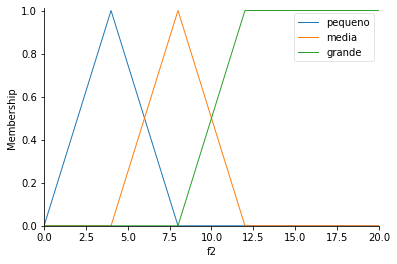

In [17]:
f2.view()

In [18]:
#tipo de função 
f3 ['pequeno'] = fuzz.trimf(f3.universe, [0,4,8])
f3 ['media'] = fuzz.trimf(f3.universe, [4,8,12])
f3 ['grande'] = fuzz.trapmf(f3.universe, [8,12,20,20])

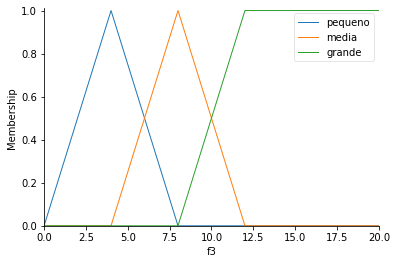

In [19]:
f3.view()

In [13]:
#tipo de função 
f1 ['pequeno'] = fuzz.trimf(f1.universe, [0,4,8])
f1 ['media'] = fuzz.trimf(f1.universe, [4,8,12])
f1 ['grande'] = fuzz.trapmf(f1.universe, [8,12,20,20])

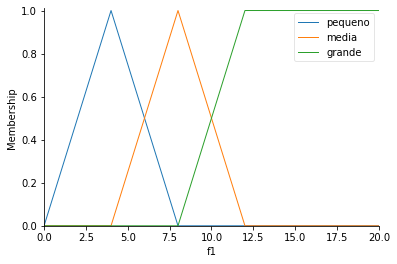

In [21]:
f1.view()

In [14]:
#tipo de função 
f4 ['pequeno'] = fuzz.trimf(f4.universe, [0,4,8])
f4 ['media'] = fuzz.trimf(f4.universe, [4,8,12])
f4 ['grande'] = fuzz.trapmf(f4.universe, [8,12,20,20])

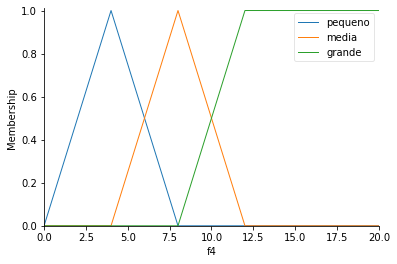

In [22]:
f4.view()

In [16]:
ext ['zero'] = fuzz.trimf(ext.universe, [0,5,5])
ext ['curta'] = fuzz.trimf(ext.universe, [0,5,10])
ext ['media'] = fuzz.trimf(ext.universe, [5,10,15])
ext ['longa'] = fuzz.trapmf(ext.universe, [10,15,20,20])

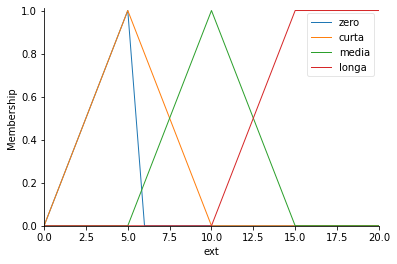

In [23]:
ext.view()

In [31]:
#regras
r1 = control.Rule(f1['grande'] & f2['pequeno'], ext ['longa'])
r2 = control.Rule(f3['media'] | f4['pequeno'], ext ['media'])
r3 = control.Rule(f2['grande'] & f1['pequeno'], ext ['zero'])


In [33]:
#controle de semaforo 
semafaro_controle = control.ControlSystem([r1, r2, r3])

In [40]:
semafaro_a = control.ControlSystemSimulation(semafaro_controle)

In [41]:
semafaro_a.input['f1'] = 10
semafaro_a.input['f2'] = 3
semafaro_a.input['f3'] = 0
semafaro_a.input['f4'] = 1

In [42]:
semafaro_a.compute()

In [43]:
#tempo do semaforo 
semafaro_a.output

OrderedDict([('ext', 13.926818014027317)])

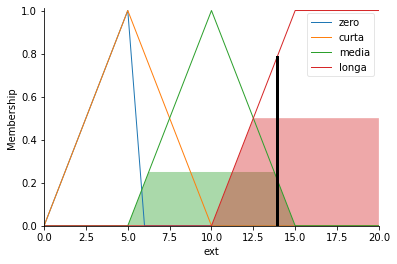

In [44]:
# visualizara o resultado de tempo do semafaaro A 
ext.view(sim=semafaro_a)